In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Use the Citipy module to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 
        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | agdas
Processing Record 9 of Set 1 | paamiut
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | amahai
Processing Record 14 of Set 1 | halalo
City not found. Skipping...
Processing Record 15 of Set 1 | suntar
Processing Record 16 of Set 1 | korla
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | serenje
Processing Record 19 of Set 1 | kui buri
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | airai
Processing Record 22 of Set 1 | alice springs
Proc

Processing Record 41 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 42 of Set 4 | dikson
Processing Record 43 of Set 4 | ilulissat
Processing Record 44 of Set 4 | horconcitos
Processing Record 45 of Set 4 | high level
Processing Record 46 of Set 4 | veraval
Processing Record 47 of Set 4 | pevek
Processing Record 48 of Set 4 | carballo
Processing Record 49 of Set 4 | dali
Processing Record 50 of Set 4 | mbini
Processing Record 1 of Set 5 | baruun-urt
Processing Record 2 of Set 5 | ternate
Processing Record 3 of Set 5 | isangel
Processing Record 4 of Set 5 | dzhusaly
City not found. Skipping...
Processing Record 5 of Set 5 | rundu
Processing Record 6 of Set 5 | mehamn
Processing Record 7 of Set 5 | calvia
Processing Record 8 of Set 5 | anloga
Processing Record 9 of Set 5 | monte santo de minas
Processing Record 10 of Set 5 | awjilah
Processing Record 11 of Set 5 | evensk
Processing Record 12 of Set 5 | pisco
Processing Record 13 of Set 5 | maniitsoq
Processing Record 1

Processing Record 28 of Set 8 | wangkui
Processing Record 29 of Set 8 | iquitos
Processing Record 30 of Set 8 | aquiraz
Processing Record 31 of Set 8 | yarada
Processing Record 32 of Set 8 | outram
Processing Record 33 of Set 8 | meyungs
City not found. Skipping...
Processing Record 34 of Set 8 | dwarka
Processing Record 35 of Set 8 | moree
Processing Record 36 of Set 8 | olavarria
Processing Record 37 of Set 8 | vestmanna
Processing Record 38 of Set 8 | khuzhir
Processing Record 39 of Set 8 | kilakarai
Processing Record 40 of Set 8 | tunduma
Processing Record 41 of Set 8 | katsuura
Processing Record 42 of Set 8 | darovskoy
Processing Record 43 of Set 8 | fukue
Processing Record 44 of Set 8 | marzuq
Processing Record 45 of Set 8 | port-gentil
Processing Record 46 of Set 8 | kahului
Processing Record 47 of Set 8 | samusu
City not found. Skipping...
Processing Record 48 of Set 8 | miles city
Processing Record 49 of Set 8 | tiarei
Processing Record 50 of Set 8 | matamoros
Processing Recor

Processing Record 19 of Set 12 | seydisehir
Processing Record 20 of Set 12 | gimli
Processing Record 21 of Set 12 | la roche-sur-yon
Processing Record 22 of Set 12 | sergeyevka
Processing Record 23 of Set 12 | fairview
Processing Record 24 of Set 12 | ikom
Processing Record 25 of Set 12 | moerai
Processing Record 26 of Set 12 | namibe
Processing Record 27 of Set 12 | inhambane
Processing Record 28 of Set 12 | bandarbeyla
Processing Record 29 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 30 of Set 12 | ola
Processing Record 31 of Set 12 | miandoab
Processing Record 32 of Set 12 | linguere
Processing Record 33 of Set 12 | lingao
Processing Record 34 of Set 12 | ixtacomitan
Processing Record 35 of Set 12 | buariki
City not found. Skipping...
Processing Record 36 of Set 12 | peleduy
Processing Record 37 of Set 12 | windhoek
Processing Record 38 of Set 12 | damolog
Processing Record 39 of Set 12 | belmonte
Processing Record 40 of Set 12 | udachnyy
Processing Rec

In [10]:
len(city_data)

575

In [11]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,70.00,51,26,12.44,AU,2020-04-24 03:09:33
1,Hilo,19.73,-155.09,80.60,57,40,9.17,US,2020-04-24 03:08:44
2,Upernavik,72.79,-56.15,24.80,97,3,7.78,GL,2020-04-24 03:09:33
3,Albany,42.60,-73.97,44.60,45,75,6.93,US,2020-04-24 03:05:46
4,Rikitea,-23.12,-134.97,76.01,77,24,12.17,PF,2020-04-24 03:09:34
5,Saint-Philippe,-21.36,55.77,75.20,88,20,10.29,RE,2020-04-24 03:09:34
6,Agdas,40.65,47.48,41.00,93,90,4.70,AZ,2020-04-24 03:09:35
7,Paamiut,61.99,-49.67,35.22,86,82,6.08,GL,2020-04-24 03:09:35
8,Hobart,-42.88,147.33,63.00,42,75,17.22,AU,2020-04-24 03:09:35
9,Chokurdakh,70.63,147.92,25.74,96,0,7.96,RU,2020-04-24 03:09:35


In [12]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-04-24 03:09:33,-33.65,115.33,70.00,51,26,12.44
1,Hilo,US,2020-04-24 03:08:44,19.73,-155.09,80.60,57,40,9.17
2,Upernavik,GL,2020-04-24 03:09:33,72.79,-56.15,24.80,97,3,7.78
3,Albany,US,2020-04-24 03:05:46,42.60,-73.97,44.60,45,75,6.93
4,Rikitea,PF,2020-04-24 03:09:34,-23.12,-134.97,76.01,77,24,12.17
...,...,...,...,...,...,...,...,...,...
570,Thomaston,US,2020-04-24 03:11:39,32.89,-84.33,62.60,93,90,13.87
571,Tocopilla,CL,2020-04-24 03:11:39,-22.09,-70.20,69.85,38,16,3.83
572,Ust-Maya,RU,2020-04-24 03:11:39,60.42,134.53,35.83,73,100,3.11
573,Bairiki,KI,2020-04-24 03:11:40,1.33,172.98,87.80,74,20,13.87


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Import the time module
import time
#Get today's date in seconds
today = time.time()
today

1587697900.98334

In [15]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [16]:
today = time.strftime("%x")
today

'04/23/20'

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

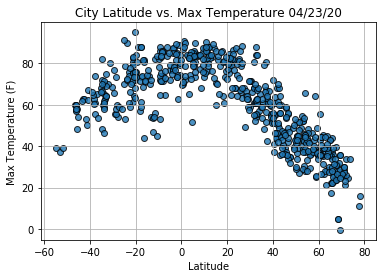

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


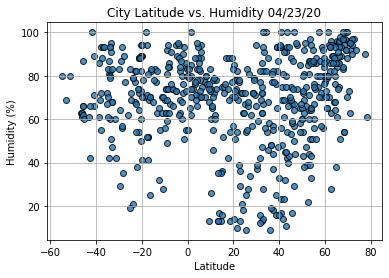

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

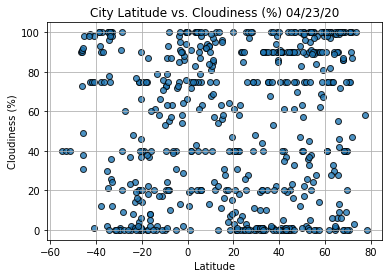

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

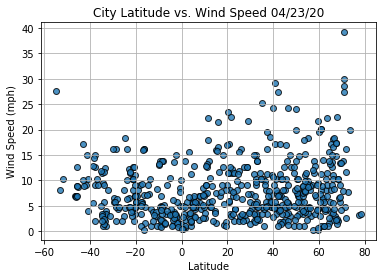

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                        Korla
Country                        CN
Date          2020-04-24 03:09:25
Lat                         41.76
Lng                         86.15
Max Temp                    68.16
Humidity                       14
Cloudiness                      0
Wind Speed                   7.54
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
570     True
571    False
572     True
573     True
574    False
Name: Lat, Length: 575, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hilo,US,2020-04-24 03:08:44,19.73,-155.09,80.60,57,40,9.17
2,Upernavik,GL,2020-04-24 03:09:33,72.79,-56.15,24.80,97,3,7.78
3,Albany,US,2020-04-24 03:05:46,42.60,-73.97,44.60,45,75,6.93
6,Agdas,AZ,2020-04-24 03:09:35,40.65,47.48,41.00,93,90,4.70
7,Paamiut,GL,2020-04-24 03:09:35,61.99,-49.67,35.22,86,82,6.08


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hilo,US,2020-04-24 03:08:44,19.73,-155.09,80.60,57,40,9.17
2,Upernavik,GL,2020-04-24 03:09:33,72.79,-56.15,24.80,97,3,7.78
3,Albany,US,2020-04-24 03:05:46,42.60,-73.97,44.60,45,75,6.93
6,Agdas,AZ,2020-04-24 03:09:35,40.65,47.48,41.00,93,90,4.70
7,Paamiut,GL,2020-04-24 03:09:35,61.99,-49.67,35.22,86,82,6.08


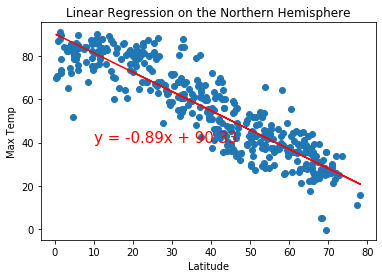

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Northern Hemisphere")
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere //n for Maximum Temperature', 'Max Temp',(10,40))


In [28]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-04-24 03:09:33,-33.65,115.33,70.00,51,26,12.44
4,Rikitea,PF,2020-04-24 03:09:34,-23.12,-134.97,76.01,77,24,12.17
5,Saint-Philippe,RE,2020-04-24 03:09:34,-21.36,55.77,75.20,88,20,10.29
8,Hobart,AU,2020-04-24 03:09:35,-42.88,147.33,63.00,42,75,17.22
10,Bluff,NZ,2020-04-24 03:09:35,-46.60,168.33,60.01,63,90,7.00


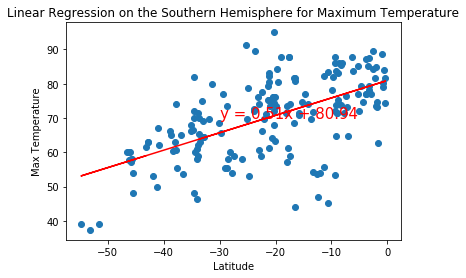

In [29]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Southern Hemisphere for Maximum Temperature")

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create a scatter plot and plot the regression line.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation.
plt.annotate(line_eq,(-30, 70), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature")
plt.show()


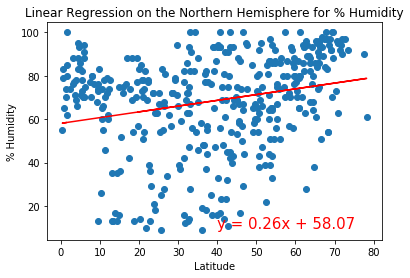

In [30]:
# To find the humidity for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere for % Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere //n for % Humidity', '% Humidity',(40,10))

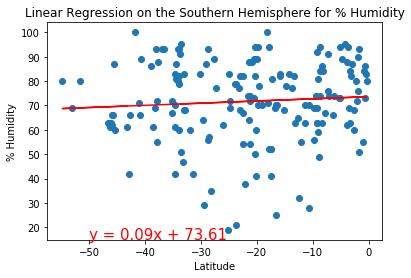

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere for % Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere //n for % Humidity', '% Humidity',(-50,15))

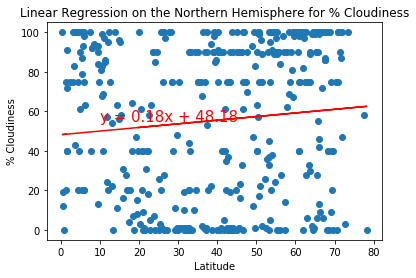

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere for % Cloudiness")
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere //n for % Cloudiness', '% Cloudiness',(10,55))

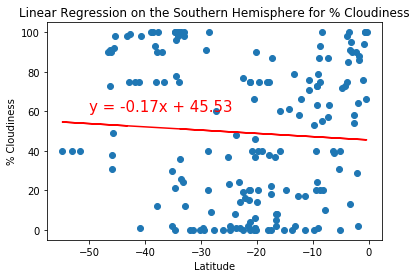

In [33]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere for % Cloudiness")
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Southern Hemisphere //n for % Cloudiness', '% Cloudiness',(-50,60))

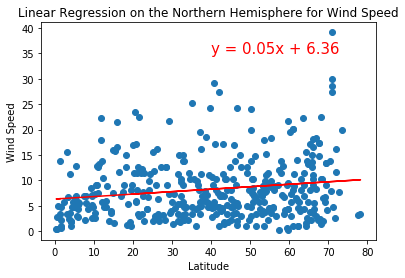

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title(f"Linear Regression on the Northern Hemisphere for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere //n for Wind Speed', 'Wind Speed',(40,35))

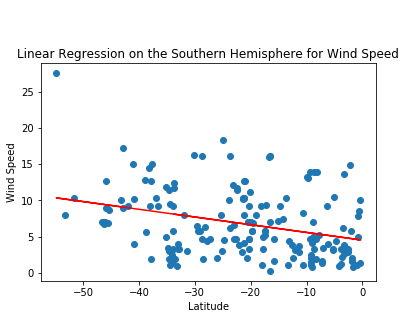

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere for Wind Speed")

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere //n for Wind Speed', 'Wind Speed',(-50,35))

